# Imports

In [82]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from numpy import log
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

#### Create Train and Test Data

In [83]:
df = pd.read_csv("./jpm_daily_close.csv",index_col=0)
df['datetime']=pd.to_datetime(df['datetime'])
df=df.dropna().reset_index(drop=True)

df.index=pd.to_datetime(df['datetime'])

train = df.loc[df['datetime']<=pd.datetime(2019,1, 27)]
test = df.loc[df['datetime']>pd.datetime(2019,1, 27)]

df=df.drop('datetime',axis=1)
train=train.drop('datetime',axis=1)
test=test.drop('datetime',axis=1)

In [86]:
train.head()

value_CAC40   value_DAX30  Open_dowjones  High_dowjones  \
datetime                                                               
2011-02-15   4110.339800     7400.0400    4193.240234    4212.509766   
2011-02-16   4151.259800     7414.2998    4189.620117    4237.089844   
2011-02-17   4152.310100     7405.5098    4212.169922    4241.990234   
2011-02-18   4157.140100     7426.8101    4224.669922    4254.569824   
2011-02-19   4137.230133     7391.8101    4206.967407    4247.902343   

            Low_dowjones        price  Volume_dowjones   value_hangseng  \
datetime                                                                  
2011-02-15   4157.140137  4190.729980     3.926860e+09     22899.779300   
2011-02-16   4175.370117  4212.609863     1.966450e+09     23156.970700   
2011-02-17   4187.149902  4224.580078     1.966450e+09     23301.839800   
2011-02-18   4201.580078  4237.169922     1.162310e+09     23595.240200   
2011-02-19   4183.642578  4216.342407     1.202428e+09     23558.633433   

            Open_nasdaq  High_nasdaq  ...         ma21        26ema  \
datetime                              ...                             
2011-02-15  2809.020020  2813.129883  ...  4129.994757  4138.513205   
2011-02-16  2815.090088  2828.189941  ...  4134.406657  4144.561389   
2011-02-17  2816.120117  2835.199951  ...  4140.611898  4151.044009   
2011-02-18  2833.350098  2840.510010  ...  4147.809035  4157.973310   
2011-02-19  2823.872559  2832.427491  ...  4146.800448  4157.973310   

                  12ema       MACD       20sd   upper_band   lower_band  \
datetime                                                                  
2011-02-15  4160.217663  21.704458  41.672530  4213.339818  4046.649696   
2011-02-16  4168.342464  23.781075  44.559497  4223.525652  4045.287662   
2011-02-17  4177.052881  26.008872  47.016501  4234.644900  4046.578896   
2011-02-18  4186.354495  28.381185  49.379394  4246.567824  4049.050247   
2011-02-19  4186.354495  28.381185  49.399801  4245.547768  4048.053128   

                    ema     momentum  log_momentum  
datetime                                            
2011-02-15  4191.781642  4189.729980      8.340869  
2011-02-16  4205.667123  4211.609863      8.346075  
2011-02-17  4218.275760  4223.580078      8.348912  
2011-02-18  4230.871868  4236.169922      8.351887  
2011-02-19  4230.871868  4215.342407      8.346924  

[5 rows x 31 columns]

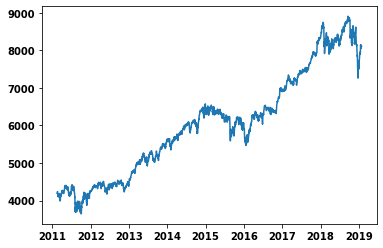

In [88]:
# plt.xlabel("Date")
# plt.ylabel("#Passengers")
plt.plot(train['price'])

Checks if series is stationary

Perform Dicky-Fuller Test

In [103]:
#p-value > .05 DATA IS NON-STATIONARY

In [105]:
print('Result of Dicky=Fuller Test')
dftest = adfuller(train['price'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic', 'p-value', '#Lags Used', '#Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Result of Dicky=Fuller Test
ADF Statistic             -0.614124
p-value                    0.867759
#Lags Used                11.000000
#Observations Used      2892.000000
Critical Value (1%)       -3.432613
Critical Value (5%)       -2.862540
Critical Value (10%)      -2.567302
dtype: float64


In [98]:
print("P-val:", adfuller(result.dropna())[1])

P-val: 6.276342699249687e-30


In [118]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    # Determinign rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics

    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Result of Dicky=Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic', 'p-value', '#Lags Used', '#Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

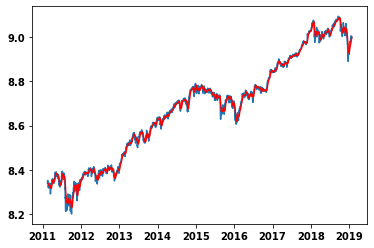

In [113]:
# Estimating trend

indexed_data_log_scale = np.log(train['price'])
moving_average = indexed_data_log_scale.rolling(window=12).mean()
moving_std = indexed_data_log_scale.rolling(window=12).mean()

plt.plot(indexed_data_log_scale)
plt.plot(moving_average, color='red')

In [114]:
dataset_log_scale_minus_moving_average = indexed_data_log_scale - moving_average
dataset_log_scale_minus_moving_average.dropna(inplace=True)
dataset_log_scale_minus_moving_average.head(12)

datetime
2011-02-26   -0.007604
2011-02-27   -0.004322
2011-02-28   -0.000823
2011-03-01   -0.014866
2011-03-02   -0.009992
2011-03-03    0.007949
2011-03-04    0.001213
2011-03-05    0.000124
2011-03-06   -0.001227
2011-03-07   -0.003374
2011-03-08    0.009738
2011-03-09    0.010491
Name: price, dtype: float64

In [116]:
dataset_log_scale_minus_moving_average

datetime
2011-02-26   -0.007604
2011-02-27   -0.004322
2011-02-28   -0.000823
2011-03-01   -0.014866
2011-03-02   -0.009992
                ...   
2019-01-23    0.007732
2019-01-24    0.008847
2019-01-25    0.010674
2019-01-26    0.006376
2019-01-27    0.002503
Name: price, Length: 2893, dtype: float64

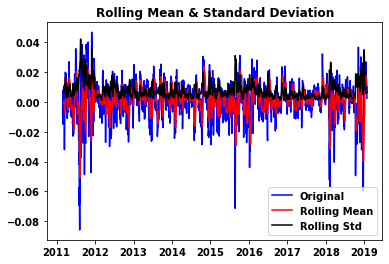

Result of Dicky=Fuller Test
ADF Statistic          -1.284273e+01
p-value                 5.562417e-24
#Lags Used              1.500000e+01
#Observations Used      2.877000e+03
Critical Value (1%)    -3.432625e+00
Critical Value (5%)    -2.862545e+00
Critical Value (10%)   -2.567305e+00
dtype: float64


In [119]:
test_stationarity(dataset_log_scale_minus_moving_average)

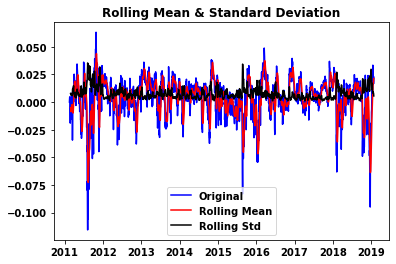

Result of Dicky=Fuller Test
ADF Statistic          -8.722441e+00
p-value                 3.357151e-14
#Lags Used              1.600000e+01
#Observations Used      2.887000e+03
Critical Value (1%)    -3.432617e+00
Critical Value (5%)    -2.862542e+00
Critical Value (10%)   -2.567303e+00
dtype: float64


In [120]:
dataset_log_scale_ewm = indexed_data_log_scale.ewm(halflife=12, min_periods=0, adjust=True).mean()
dataset_log_scale_minus_ewm = indexed_data_log_scale - dataset_log_scale_ewm
test_stationarity(dataset_log_scale_minus_ewm)

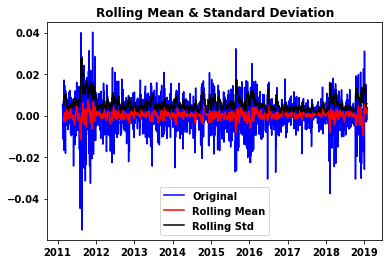

Result of Dicky=Fuller Test
ADF Statistic          -1.413449e+01
p-value                 2.302882e-26
#Lags Used              1.500000e+01
#Observations Used      2.887000e+03
Critical Value (1%)    -3.432617e+00
Critical Value (5%)    -2.862542e+00
Critical Value (10%)   -2.567303e+00
dtype: float64


In [121]:
dataset_log_first_order_diff = indexed_data_log_scale - indexed_data_log_scale.shift()
dataset_log_first_order_diff.dropna(inplace=True)
test_stationarity(dataset_log_first_order_diff)

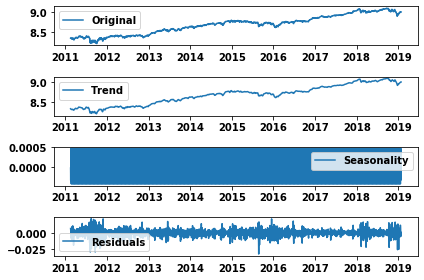

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexed_data_log_scale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_data_log_scale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

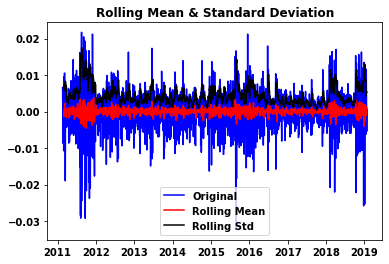

Result of Dicky=Fuller Test
ADF Statistic          -1.681222e+01
p-value                 1.196517e-29
#Lags Used              2.800000e+01
#Observations Used      2.869000e+03
Critical Value (1%)    -3.432631e+00
Critical Value (5%)    -2.862548e+00
Critical Value (10%)   -2.567307e+00
dtype: float64


In [123]:
decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)

c:\users\brian\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


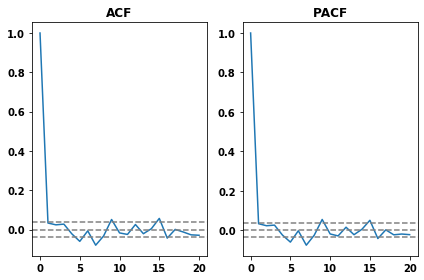

In [124]:
# ACF and PACF plots|:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataset_log_first_order_diff, nlags=20)
lag_pacf = pacf(dataset_log_first_order_diff, nlags=20, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
plt.title('PACF')
plt.tight_layout()

c:\users\brian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\brian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.1307')

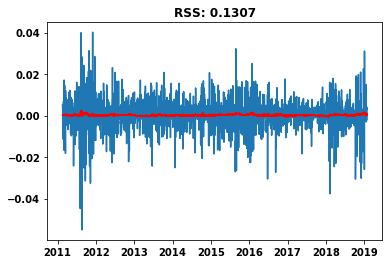

In [127]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA Model
model = ARIMA(indexed_data_log_scale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataset_log_first_order_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataset_log_first_order_diff)**2))

In [133]:
indexed_data_log_scale.loc[indexed_data_log_scale.index[0]]

8.340630217312123

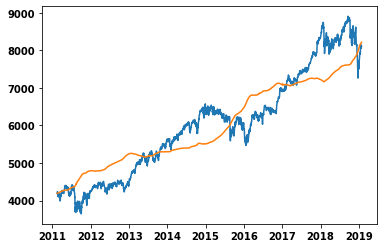

In [139]:
# Get back to the state before differening
preds = pd.Series(indexed_data_log_scale.loc[indexed_data_log_scale.index[0]]).append(results_ARIMA.fittedvalues).cumsum()
preds.index=indexed_data_log_scale.index

# Get exponetials
predictions_ARIMA = np.exp(preds)

# Plot predicted data vs original data
plt.plot(train['price'])
plt.plot(predictions_ARIMA)

In [140]:
len(train['price'])

2904

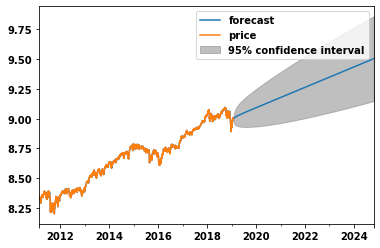

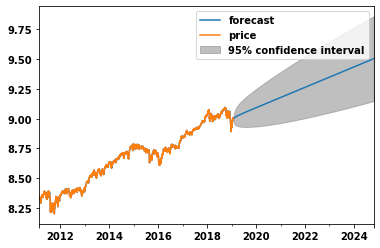

In [142]:
results_ARIMA.plot_predict(1,5000)

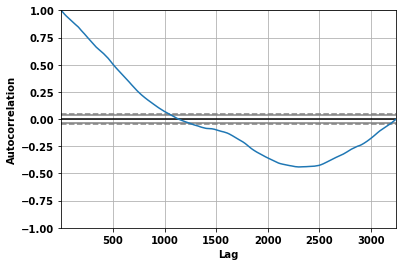

In [12]:
autocorrelation_plot(data)
# plt.figure(figsize=(12, 8))
plt.show() 


#p value can be 5

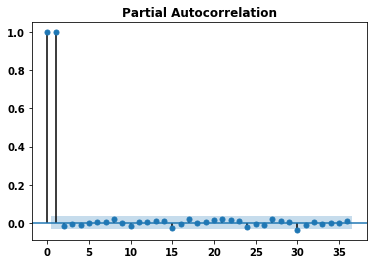

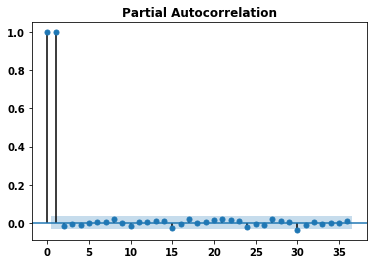

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data)
# Q CAN BE 2

In [43]:
# ARIMA(DATA, ORDER=(P,D,Q))
model = ARIMA(data, order=(5, 1, 2))
model = model.fit(disp=0)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 3241
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16534.564
Method:                       css-mle   S.D. of innovations             39.755
Date:                Sun, 28 Feb 2021   AIC                          33087.129
Time:                        14:33:32   BIC                          33141.881
Sample:                             1   HQIC                         33106.746
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6058      0.664      2.419      0.016       0.305       2.907
ar.L1.D.price     0.2177      1.417      0.154      0.878      -2.560       2.995
ar.L2.D.price     0.4711      1.228     

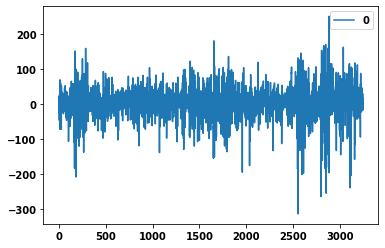

In [44]:
residuals = pd.DataFrame(model.resid)
residuals.plot()

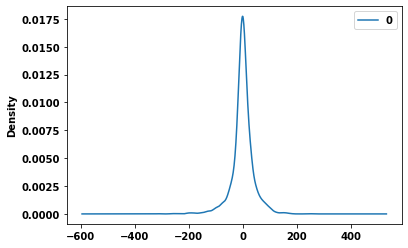

In [45]:
residuals.plot(kind='kde')

In [47]:
residuals.describe()

0
count  3241.000000
mean     -0.002227
std      39.761515
min    -313.382840
25%     -14.114485
50%       0.116653
75%      16.079391
max     249.936547

In [48]:
X = df.price.values
train_indices = int(len(X) * 0.80)
train, test = X[0:train_indices], X[train_indices:len(X)]
result = [x for x in train]
predictions = list()
for idx in range(len(test)):
  model = ARIMA(result, order=(5,1,0))
  fit_model = model.fit(disp=0)
  output = fit_model.forecast()
  y_pred = output[0]
  predictions.append(y_pred)
  result.append(test[idx])

In [49]:
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error:.3}')

Test MSE: 2.83e+03


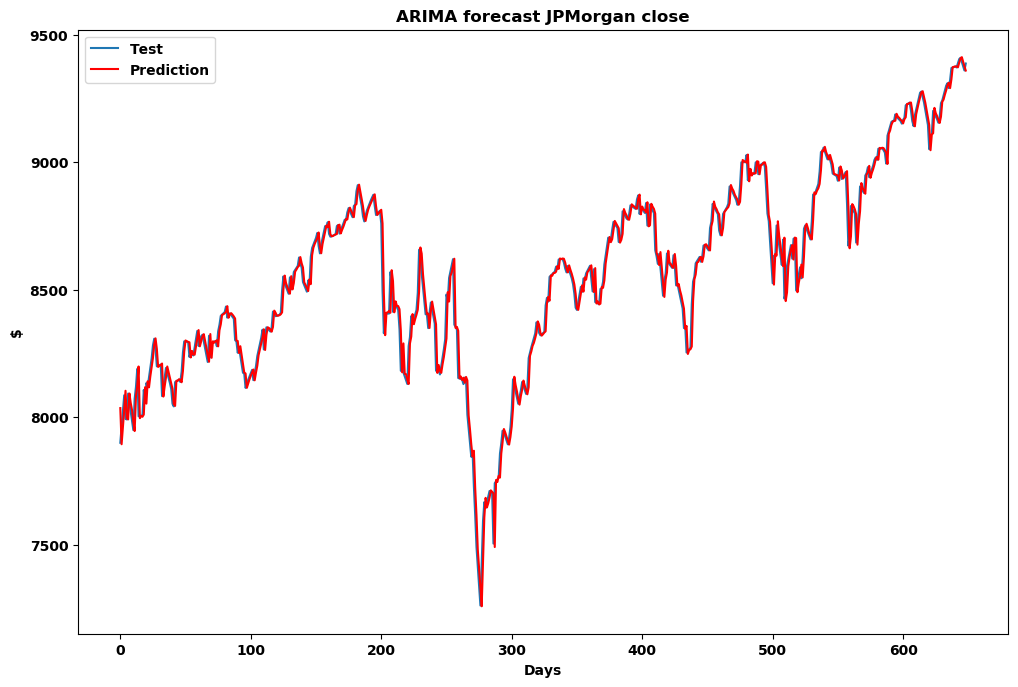

In [50]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('$')
plt.title('ARIMA forecast JPMorgan close')
plt.legend()
plt.show()

In [55]:
def foo(*args):
  print('foo(',*args,')')
  
  def inside_foo(x):
    print('inside_foo')
    def inside_inside_foo(*args):
      print('inside_inside_foo(',*args,')')
      return x(*args)
    return inside_inside_foo
  return inside_foo
          
@foo(1,2,3)
def bar(*args):
  return sum(args)
          
print('outside')
print(bar(4,5,6))

foo( 1 2 3 )
inside_foo
outside
inside_inside_foo( 4 5 6 )
15


In [56]:
{1:3}.keys()

dict_keys([1])